# Avance 1. Análisis exploratorio de datos
# Equipo 2


## David Moisés Alfandari Martínez - A01794577

## Fernando García Corona          - A01793717

## Jesús Elías Ruiz Montoya         - A01794485

In [ ]:
# Montar Google Drive para cargar los datos.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
# Cargar el archivo CSV.
df = pd.read_csv('/content/drive/MyDrive/Proyecto Integrador/MultiFillRadiator.csv')

<ipython-input-3-b0f0e2ba6945>:2: DtypeWarning: Columns (5,6,23,24,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Proyecto Integrador/MultiFillRadiator.csv')


### Información general del DataFrame

In [ ]:
# Exploración general del DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155213 entries, 0 to 155212
Data columns (total 65 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Machine                                155213 non-null  object 
 1   Timestamp                              155213 non-null  object 
 2   VIN                                    155213 non-null  object 
 3   ROT                                    155213 non-null  int64  
 4   Cycle Result                           155213 non-null  object 
 5   Failed on Field                        5 non-null       object 
 6   Machine ID                             155213 non-null  object 
 7   Cycle Time                             155213 non-null  float64
 8   Vacuum                                 155213 non-null  int64  
 9   Pressure                               155213 non-null  float64
 10  Volume                                 155213 non-null  

### Tipos de datos por columna

In [ ]:
# Revisar tipos de datos.
df.dtypes

,0
Machine,object
Timestamp,object
VIN,object
ROT,int64
Cycle Result,object
...,...
Unnamed: 60,float64
Unnamed: 61,float64
Unnamed: 62,float64
Unnamed: 63,float64


Se identifican columnas que no ofrecen información valiosa. La columna 1, 2, 4, 6 y la 24. Posteriormente se disponen las columnas 33 a la 64 ya que no agregan valores útiles al análisis.

In [ ]:
df.drop(df.columns[[0,1,3,6,25]], axis=1, inplace=True)
df.head()

,VIN,Cycle Result,Failed on Field,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume,EPS Style Selected,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,3FMCR9G61PRD83891,Pass,NaN,75.69,6,20.5,8.27,0.0,3.7,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3FTTW8F96PRA56244,Pass,NaN,77.50,9,20.8,9.11,0.0,4.2,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3FTTW8E30PRA57533,Pass,NaN,82.14,6,20.5,11.21,0.0,3.8,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3FTTW8F9XPRA63150,Pass,NaN,76.50,8,20.4,9.20,0.0,3.3,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3FMCR9B65PRD84047,Pass,NaN,74.91,6,20.5,8.20,0.0,4.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(df.columns[29:61], axis=1, inplace=True)
df.head()

,VIN,Cycle Result,Failed on Field,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume,EPS Style Selected,...,Air Test Achieved Pressure Decay Time,Air Test Cycle Time,Air Test Result,Actual Style Selected,Vacuum Time,Pre-Flowback Stabilize Time,Vacuum Small Leak Decay Level,Vacuum Small Leak Decay Time,Vacuum 2 Level,Vacuum 2 Time
0,3FMCR9G61PRD83891,Pass,NaN,75.69,6,20.5,8.27,0.0,3.7,7.0,...,5.0,18.1,Pass,7,34.5,1.0,2.8,5.0,6.0,5.0
1,3FTTW8F96PRA56244,Pass,NaN,77.50,9,20.8,9.11,0.0,4.2,7.0,...,5.0,18.2,Pass,7,34.5,1.0,5.2,5.0,8.0,5.0
2,3FTTW8E30PRA57533,Pass,NaN,82.14,6,20.5,11.21,0.0,3.8,7.0,...,5.0,18.8,Pass,7,34.5,1.0,2.5,5.0,5.0,5.0
3,3FTTW8F9XPRA63150,Pass,NaN,76.50,8,20.4,9.20,0.0,3.3,7.0,...,5.0,17.8,Pass,7,34.5,1.0,5.0,5.0,8.0,5.0
4,3FMCR9B65PRD84047,Pass,NaN,74.91,6,20.5,8.20,0.0,4.0,7.0,...,5.0,17.8,Pass,7,34.5,1.0,2.9,5.0,6.0,5.0


Se identifica la columna Failed on Field como una de las más importantes del dataset, porque ahí se indican las unidades que han fallado en campo y que pasaron el proceso de planta. Se hace el reemplazo de NaN por No, para indicar que esas "no fallaron en campo", las que fallaron ya cuentan con la etiqueta "Yes".


In [ ]:
df['Failed on Field'].replace(np.nan, 'No', inplace=True)
df.head()

,VIN,Cycle Result,Failed on Field,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume,EPS Style Selected,...,Air Test Achieved Pressure Decay Time,Air Test Cycle Time,Air Test Result,Actual Style Selected,Vacuum Time,Pre-Flowback Stabilize Time,Vacuum Small Leak Decay Level,Vacuum Small Leak Decay Time,Vacuum 2 Level,Vacuum 2 Time
0,3FMCR9G61PRD83891,Pass,No,75.69,6,20.5,8.27,0.0,3.7,7.0,...,5.0,18.1,Pass,7,34.5,1.0,2.8,5.0,6.0,5.0
1,3FTTW8F96PRA56244,Pass,No,77.50,9,20.8,9.11,0.0,4.2,7.0,...,5.0,18.2,Pass,7,34.5,1.0,5.2,5.0,8.0,5.0
2,3FTTW8E30PRA57533,Pass,No,82.14,6,20.5,11.21,0.0,3.8,7.0,...,5.0,18.8,Pass,7,34.5,1.0,2.5,5.0,5.0,5.0
3,3FTTW8F9XPRA63150,Pass,No,76.50,8,20.4,9.20,0.0,3.3,7.0,...,5.0,17.8,Pass,7,34.5,1.0,5.0,5.0,8.0,5.0
4,3FMCR9B65PRD84047,Pass,No,74.91,6,20.5,8.20,0.0,4.0,7.0,...,5.0,17.8,Pass,7,34.5,1.0,2.9,5.0,6.0,5.0


De la retroalimentación del especialista se pidió que se revisarán cuáles VINs estaban repetidos, ya que esos parámetros pueden contaminar la información. Se entienden como VINs repetidos aquellos que fallaron y posteriormente pasaron el proceso.

In [ ]:
VIN_duplicated = df[df.duplicated(subset=[df.columns[0]], keep=False)]
VIN_duplicated.head(5)

,VIN,Cycle Result,Failed on Field,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume,EPS Style Selected,...,Air Test Achieved Pressure Decay Time,Air Test Cycle Time,Air Test Result,Actual Style Selected,Vacuum Time,Pre-Flowback Stabilize Time,Vacuum Small Leak Decay Level,Vacuum Small Leak Decay Time,Vacuum 2 Level,Vacuum 2 Time
358,3FTTW8E32PRA56643,Fail,No,0.00,0,0.0,0.00,0.0,0.0,7.0,...,0.0,1.3,Fail,7,0.0,0.0,0.0,0.0,0.0,0.0
359,3FTTW8E32PRA56643,Pass,No,80.43,8,20.5,11.18,0.0,4.0,7.0,...,5.0,19.3,Pass,7,34.5,1.0,5.3,5.0,7.0,5.0
378,3FTTW8E38PRA58347,Fail,No,0.00,0,0.0,0.00,0.0,0.0,7.0,...,0.0,1.4,Fail,7,0.0,0.0,0.0,0.0,0.0,0.0
379,3FTTW8E38PRA58347,Pass,No,80.18,8,20.3,11.15,0.0,4.1,7.0,...,5.0,19.1,Pass,7,34.5,1.0,4.4,5.0,7.0,5.0
451,3FTTW8F94PRA65119,Fail,No,0.00,0,0.0,0.00,0.0,0.0,7.0,...,0.0,2.4,Fail,7,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
num_duplicated = VIN_duplicated[df.columns[0]].nunique()
num_duplicated

2170

Se identifican 2170 VINs repetidos. Se consultará al especialista cual debería ser el tratamiento de esos datos. Se piensa en varias opciones. El último VIN debería indicar que el vehículo pasó el proceso, los anteriores que fallaron. Las preguntas son, ¿por qué fallaron? ¿qué información nos dan los resultados de fallo para la predicción del modelo? Porque los fallos son variables, desde 1 hasta 12 fallos como se puede ver a continuación.

In [ ]:
list_duplicated = VIN_duplicated[df.columns[0]].value_counts()
list_duplicated

,count
VIN,
0,19
3FTTW8M3XRRA16623,12
3FTTW8E36PRB02944,9
3FTTW8E39PRA76663,9
3FTTW8E38PRA66562,8
...,...
3FTTW8A34RRA04259,2
3FTTW8A33RRA03376,2
3FMCR9D98RRE04009,2


Eventualmente se realizará un análisis de esas 2170 incidencias para entender más sobre los fallos durante el proceso, por el momento solo se indicarán como valores históricos de repetición de esos vehículos.

### ¿Cuáles son las estadísticas resumidas del conjunto de datos?

Se establecen las estadísitcas de las columnas numéricas de todas las variables del dataframe.

In [ ]:
df.describe()

,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume,EPS Style Selected,Overflow Bottle Volume,Overflow Bottle Fill Time,Evac/Fill Cycle Time,...,Air Test Achieved Pressure,Air Test Achieved Pressure Time,Air Test Achieved Pressure Decay,Actual Style Selected,Vacuum Time,Pre-Flowback Stabilize Time,Vacuum Small Leak Decay Level,Vacuum Small Leak Decay Time,Vacuum 2 Level,Vacuum 2 Time
count,155213.000000,155213.00000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,...,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000
mean,75.569631,7.50814,20.175779,9.140565,0.001394,4.136880,7.002194,0.001586,0.001550,75.539688,...,29.836153,1.842212,0.110948,6.998512,33.068125,1.368574,4.574653,4.898784,6.763743,4.898446
std,11.150291,3.25845,3.011894,1.963243,0.109931,0.940396,0.173951,0.123517,0.120214,11.104229,...,3.224304,0.310093,0.138052,0.102058,4.781055,1.263764,2.562681,0.720203,2.095100,0.704581
min,0.000000,-4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.800000,0.000000,-4.000000,0.000000
25%,74.980000,6.00000,20.300000,8.260000,0.000000,3.800000,7.000000,0.000000,0.000000,75.000000,...,29.800000,1.700000,0.100000,7.000000,33.500000,1.000000,3.100000,5.000000,6.000000,5.000000
50%,76.500000,7.00000,20.500000,9.120000,0.000000,4.200000,7.000000,0.000000,0.000000,76.500000,...,30.200000,1.800000,0.100000,7.000000,33.500000,1.000000,3.700000,5.000000,7.000000,5.000000
75%,78.870000,9.00000,20.900000,9.770000,0.000000,4.800000,7.000000,0.000000,0.000000,78.900000,...,30.600000,2.000000,0.100000,7.000000,33.500000,1.000000,5.800000,5.000000,8.000000,5.000000
max,184.000000,209.00000,83.200000,81.250000,11.000000,11.000000,20.900000,11.320000,11.310000,101.100000,...,32.900000,7.000000,14.200000,7.000000,34.500000,83.200000,81.300000,20.100000,206.000000,5.000000


### Columnas Relevantes

In [ ]:
numerical_cols = ['Vacuum', 'Pressure', 'Volume', 'Pressure Decay', 'Flowback Volume', 'EPS Style Selected', 'Overflow Bottle Fill Time', 'Evac/Fill Cycle Time' ]
categorical_cols = ['EPS Style Selected', 'Machine Cycle Status', 'Air Test Result', 'Failed on Field']
target = ['Cycle Result']

### ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

In [ ]:
df[numerical_cols].isnull().sum()

,0
Vacuum,0
Pressure,0
Volume,0
Pressure Decay,0
Flowback Volume,0
EPS Style Selected,0
Overflow Bottle Fill Time,0
Evac/Fill Cycle Time,0


In [ ]:
# Convertir columnas relevantes a numéricas, forzando que los errores sean NaN.
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir nuestra variable objetivo a 1 cuando el estado es Pass y 0 cuando no
df['Cycle Result'] = df['Cycle Result'].map({'Pass': 1}).fillna(0).astype(int)

In [ ]:
# Verificar si hay valores nulos después de la conversión.
print(df[numerical_cols].isnull().sum())

Vacuum                       0
Pressure                     0
Volume                       0
Pressure Decay               0
Flowback Volume              0
EPS Style Selected           0
Overflow Bottle Fill Time    0
Evac/Fill Cycle Time         0
dtype: int64


### ¿Hay valores atípicos en el conjunto de datos?

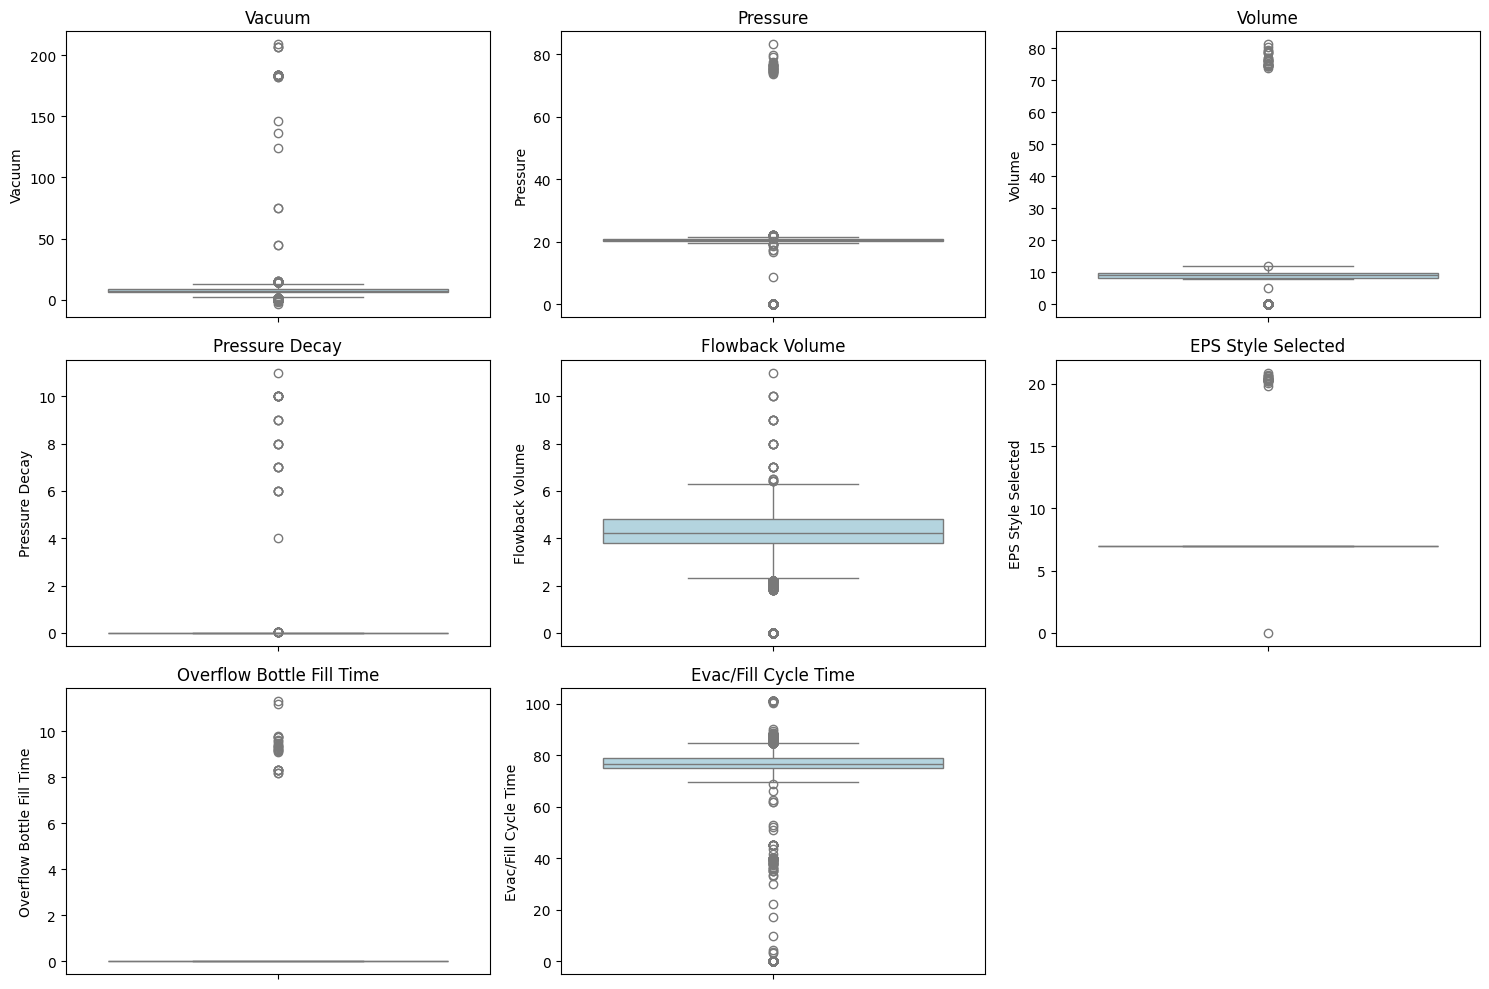

In [ ]:
# Boxplots para detectar valores atípicos.

plt.figure(figsize=(15, 10))

rows = (len(numerical_cols) // 3) + 1  # Aseguramos que hay suficientes posiciones para los subplots.
for i, col in enumerate(numerical_cols, 1): # Iterar solo sobre las columnas válidas.
    plt.subplot(rows, 3, i) # Posicionar los subplots correctamente.
    sns.boxplot(data=df[col], color='lightblue')
    plt.title(f'{col}', fontsize=12)

plt.tight_layout()
plt.show()

### ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

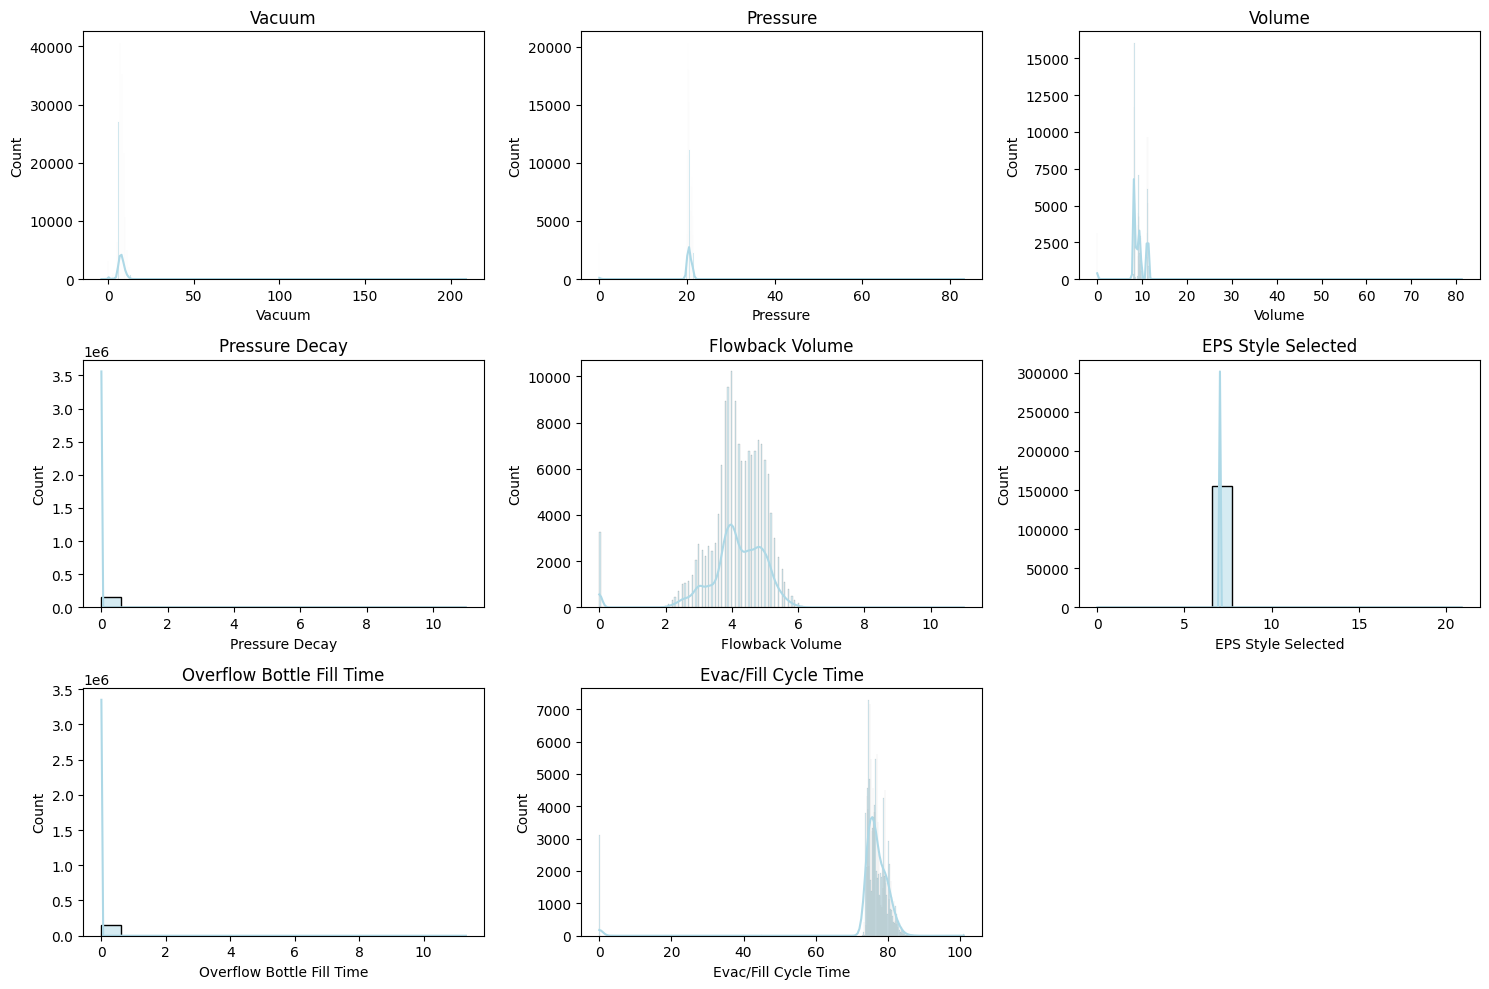

In [ ]:
# Histogramas para revisar las distribuciones.
plt.figure(figsize=(15, 10))

rows = (len(numerical_cols) // 3) + 1
for i, col in enumerate(df[numerical_cols].select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, color='lightblue')
    plt.title(f'{col}', fontsize=12)

plt.tight_layout()
plt.show()

### ¿Hay correlación entre las variables dependientes e independientes?

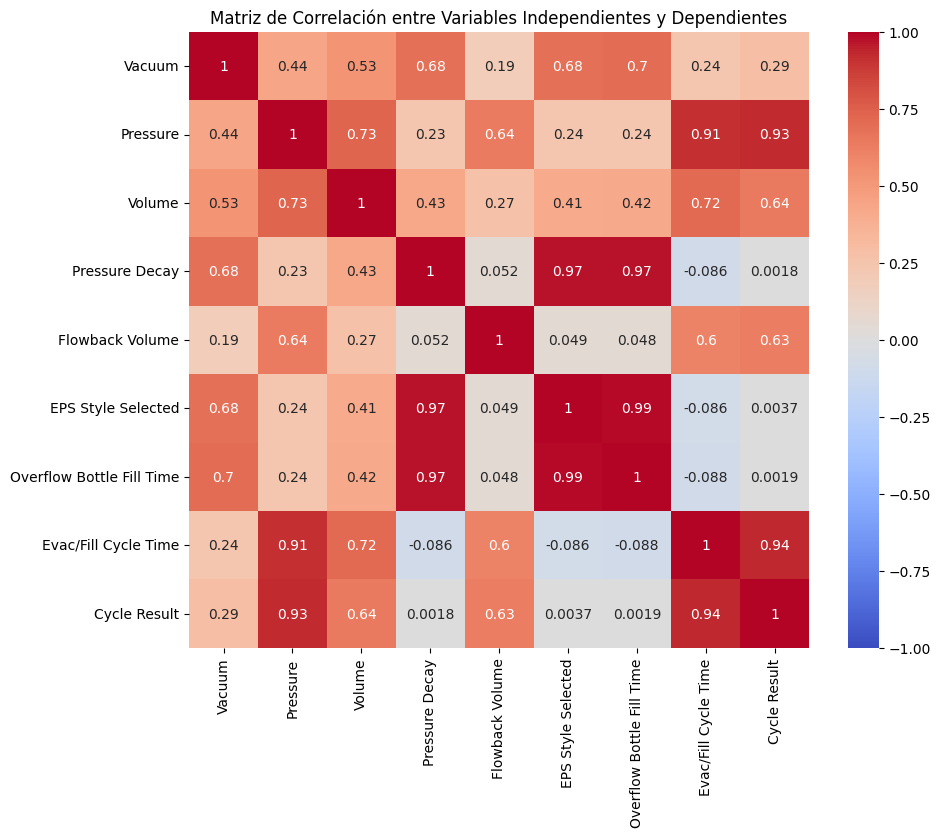

In [ ]:
X = df[numerical_cols]

Y = df[target]

combined_df = pd.concat([X, Y], axis=1)

correlation_matrix = combined_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Variables Independientes y Dependientes')
plt.show()

### ¿Cómo se distribuyen los datos en función de diferentes categorías?

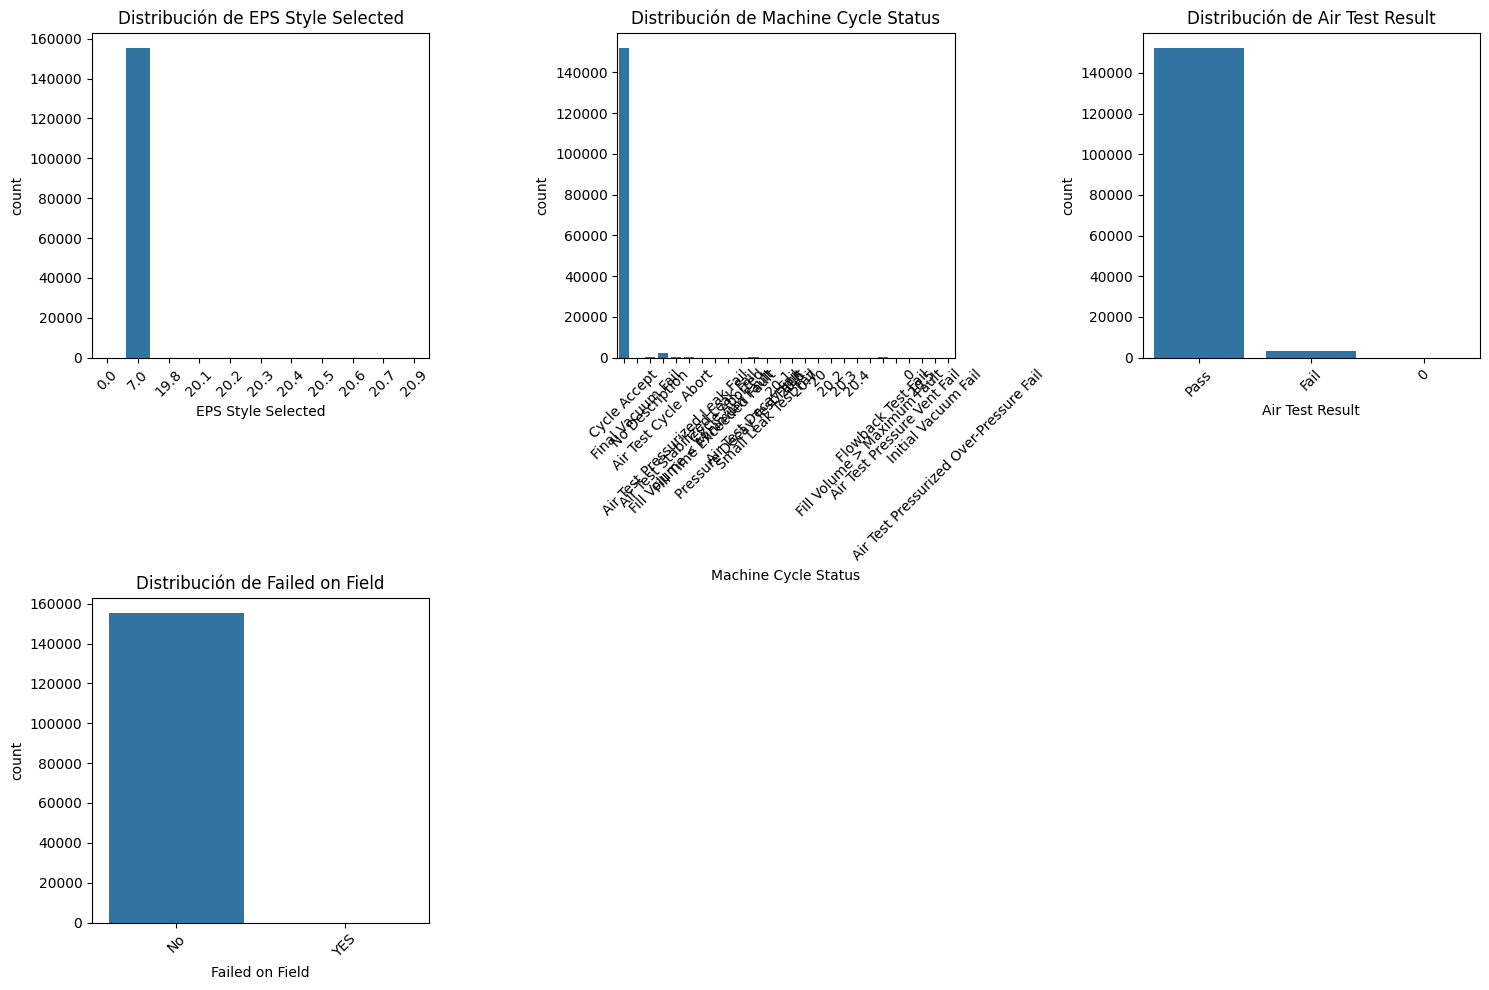

In [ ]:
# Visualización de la distribución de datos en función de diferentes categorías.
plt.figure(figsize=(15, 10))
rows = (len(categorical_cols) // 3) + 1

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=df[col], data=df)
    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xticks(rotation=45)  # Rotación de los nombres de las categorías.

plt.tight_layout()
plt.show()

### ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

Vacuum                       0
Pressure                     0
Volume                       0
Pressure Decay               0
Flowback Volume              0
EPS Style Selected           0
Overflow Bottle Fill Time    0
Evac/Fill Cycle Time         0
dtype: int64


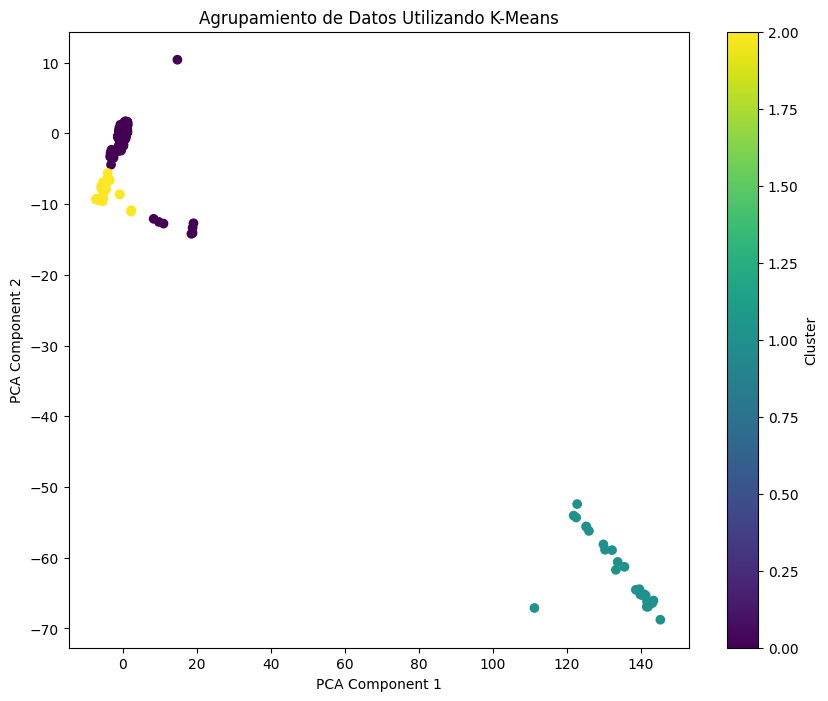

In [ ]:
# Verificamos si hay valores nulos en las columnas seleccionadas.
print(df[numerical_cols].isnull().sum())

# Imputación o eliminación de valores nulos (aquí se eliminamos las filas con NaN).
df_clean = df[numerical_cols].dropna()

# Estandarización de los datos.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Realizamos los agrupamientos por medio de: K-means clustering.
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizamos los clusters utilizando PCA para reducir la dimensionalidad a 2D.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_clean['Cluster'], cmap='viridis')
plt.title('Agrupamiento de Datos Utilizando K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

### ¿Se deberían normalizar las imágenes para visualizarlas mejor? No se trabaja con imagenes

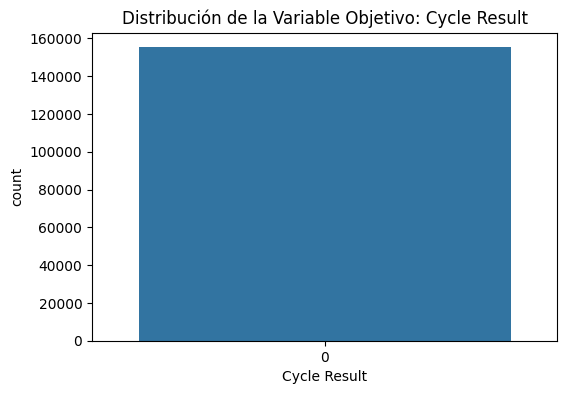

Cycle Result
0    1.0
Name: proportion, dtype: float64


In [ ]:
# Comprobación de desequilibrio en la variable objetivo 'Cycle Result'.
plt.figure(figsize=(6, 4))
sns.countplot(x='Cycle Result', data=df)
plt.title('Distribución de la Variable Objetivo: Cycle Result')
plt.show()

# Visualización de la proporción de clases.
class_distribution = df['Cycle Result'].value_counts(normalize=True)
print(class_distribution)

# Conclusiones
## Calidad y estructura de los datos
Es importante verificar si existen valores nulos en las variables numéricas del conjunto de datos que puedan impactar el análisis de exploración inicial y que posteriormente, podría impedir el proceso de agrupamiento o 'clustering'. Con el objetivo de mantener la fluidez y la integridad del análisis incluso con bases de datos postriores, fue necesario imputar dichos valores nulos o eliminar las filas correspondientes.
Por otro lado, se realizó un análisis de las estadísticas descriptivas para obtener una visión general de las distribuciones y rangos de las variables. A partir de la observación de los gráficos identificamos la necesidad de transformaciones adicionales en un tratamiento posterior.

## Valores atípicos y distribuciones
Por medio de diagramas de caja o 'boxplots', identificamos la existencia de valores atípicos en algunas variables importantes como en el tiempo del ciclo de evacuación/llenado y el volumen de llenado. La existencia de estos valores a los extremos pueden estar teniendo injerencia en el proceso general y pueden estar influyendo en las incidencias de fallos observados. Consideramos importante compartir estas observaciones con el especialista para ponderar el potencial impacto de estas desviaciones en las distribuciones.

## Correlaciones
Por medio de la matriz de correlación entre variables independientes y dependientes observamos algunas relaciones de moderada preponderancia entre algunas variables como la presión y el tiempo del ciclo de llenado, a partir de las cuales podemos sugerir el uso de modelos supervizados para predecir las magnitudes adecuadas en variables de interés.

## Patrones de datos a partir del Clustering o agrupamiento
Se aplicó el algoritmo 'K-means' para la agrupación de muestras en función de la similitud entre sus características, y el análisis visual por medio de PCA indica que los datos pueden identificarse dentro de tres 'clusters' o grupos principales. Esto sugiere  diferentes grupos de máquinas o comportamientos durante los procesos de llenado. Los patrones pueden ser útiles para una posterior segmentación entre grupos de operación en las máquinas.

## Próximos pasos a considerar con la Dra. Grettel

¿Se sugiere utilizar otros algoritmos de agrupamiento o 'clustering' para buscar que la cantidad y distribución de los grupos sea optimizada?

¿Es conveniente aplicar en este momento validación cruzada?

¿Podemos proceder en este momento a utilizar otras técnicas de reducción de dimensionalidad o redes neuronales profundas para encontrar relaciones más complejas entre los datos?
